‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!

üîπ Veri setinin ilk 5 satƒ±rƒ±:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  

üîπ Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 

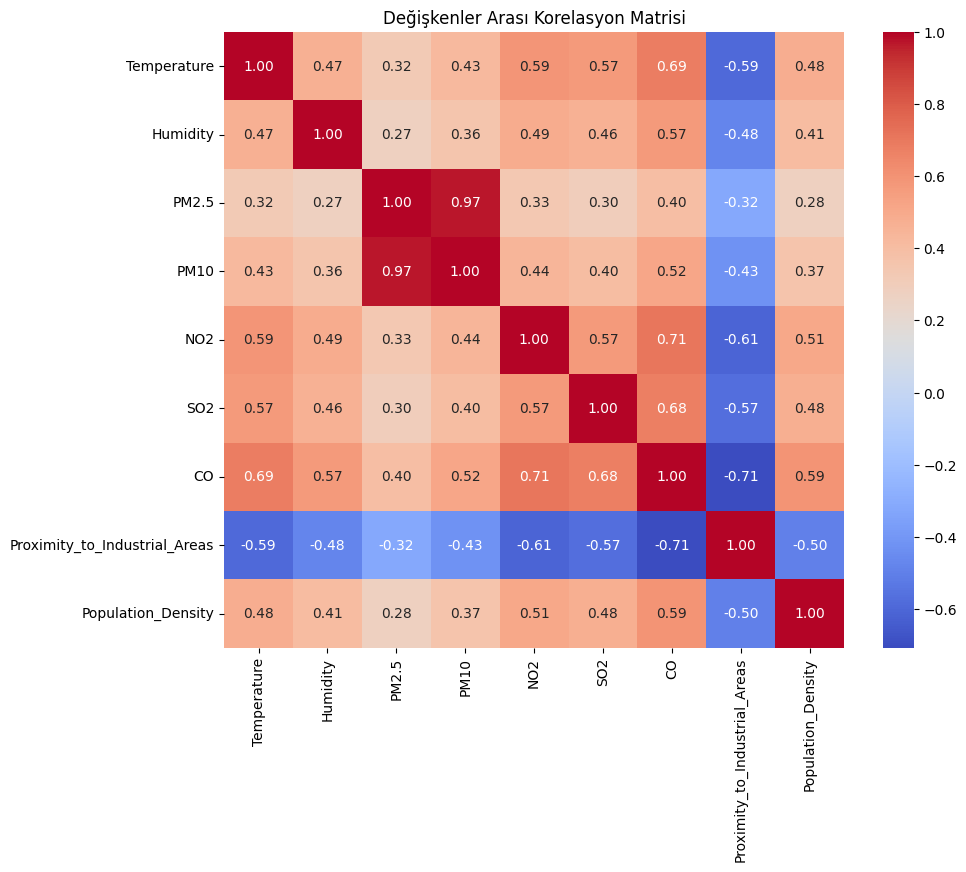


üîπ Sayƒ±sal deƒüi≈ükenlerde aykƒ±rƒ± deƒüerler i√ßin kutu grafikleri:


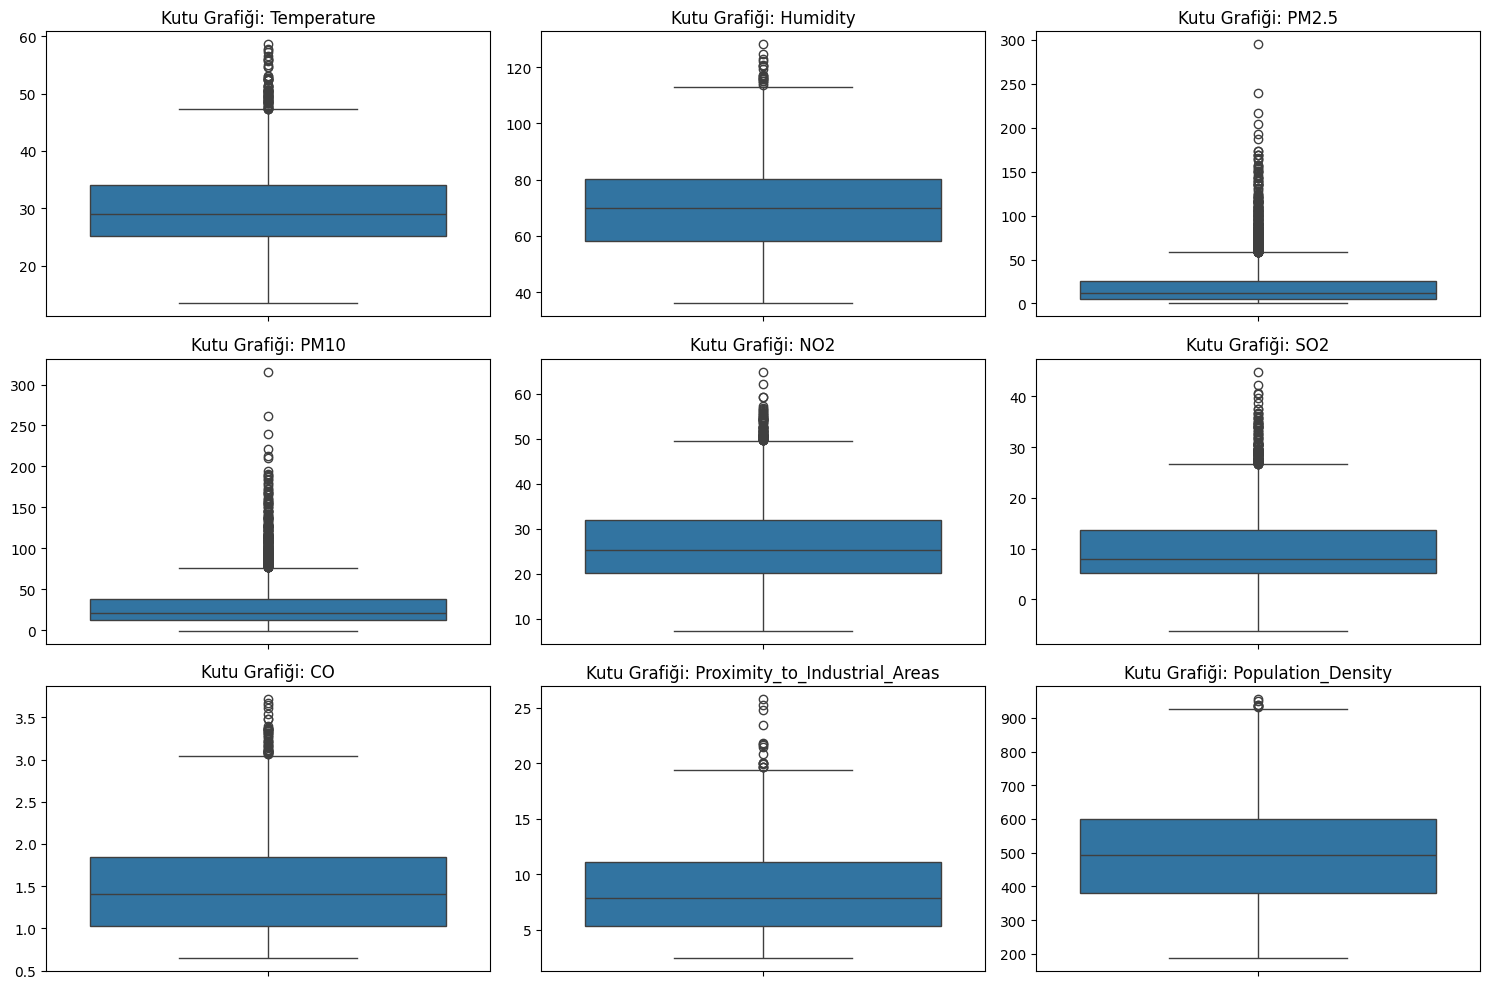


üîπ 'Air Quality_Encoded' sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:
Air Quality_Encoded
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

üîπ Orijinal etiketlerin kodlama e≈üle≈ümeleri:
Good: 0
Hazardous: 1
Moderate: 2
Poor: 3

üîπ Kodlama sonrasƒ± veri setinin ilk 5 satƒ±rƒ±:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                            6.3                 319    Moderate   
1                            6.0                 611    Moderate   
2                            5.2                 619    Moderate   
3                           11.1                 551        Good   
4                         

In [1]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Veri Y√ºkleme ve √ñn ƒ∞≈üleme

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ==============================
# 1. Veri Y√ºkleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!")
except FileNotFoundError:
    print("‚ùå Hata: 'air_quality_data.csv' dosyasƒ± bulunamadƒ±.")
    print("Dosya yolunu veya adƒ±nƒ± kontrol edin.")

# ==============================
# 2. Veri ƒ∞nceleme
# ==============================
print("\nüîπ Veri setinin ilk 5 satƒ±rƒ±:")
print(df.head())

print("\nüîπ Veri setinin genel bilgileri:")
df.info()

print("\nüîπ Eksik deƒüerlerin sayƒ±sƒ±:")
print(df.isnull().sum())

print("\nüîπ Eksik deƒüerlerin y√ºzde daƒüƒ±lƒ±mƒ±:")
print((df.isnull().sum() / len(df)) * 100)

print("\nüîπ 'Air Quality' s√ºtununun benzersiz deƒüerleri ve daƒüƒ±lƒ±mƒ±:")
print(df['Air Quality'].value_counts())
print(df['Air Quality'].unique())

print("\nüîπ Sayƒ±sal deƒüi≈ükenlerin betimleyici istatistikleri:")
print(df.describe())

# ==============================
# 3. Korelasyon Analizi
# ==============================
print("\nüîπ Deƒüi≈ükenler arasƒ± korelasyon matrisi:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Deƒüi≈ükenler Arasƒ± Korelasyon Matrisi')
plt.show()

# ==============================
# 4. Aykƒ±rƒ± Deƒüer Analizi (Boxplot)
# ==============================
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nüîπ Sayƒ±sal deƒüi≈ükenlerde aykƒ±rƒ± deƒüerler i√ßin kutu grafikleri:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Kutu Grafiƒüi: {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# ==============================
# 5. Label Encoding (Hedef Deƒüi≈üken)
# ==============================
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded['Air Quality_Encoded'] = label_encoder.fit_transform(df_encoded['Air Quality'])

print("\nüîπ 'Air Quality_Encoded' sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:")
print(df_encoded['Air Quality_Encoded'].value_counts())

print("\nüîπ Orijinal etiketlerin kodlama e≈üle≈ümeleri:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

print("\nüîπ Kodlama sonrasƒ± veri setinin ilk 5 satƒ±rƒ±:")
print(df_encoded.head())

df = df_encoded.copy()  # G√ºncel veri seti

# ==============================
# 6. Standardizasyon
# ==============================
numeric_cols_for_scaling = df.select_dtypes(include=['number']).columns.tolist()

# 'Air Quality' (kategorik) ve 'Air Quality_Encoded' (hedef) s√ºtunlarƒ±nƒ± √ßƒ±kartƒ±yoruz
for col in ['Air Quality', 'Air Quality_Encoded']:
    if col in numeric_cols_for_scaling:
        numeric_cols_for_scaling.remove(col)

scaler = StandardScaler()
df[numeric_cols_for_scaling] = scaler.fit_transform(df[numeric_cols_for_scaling])

print("\nüîπ Standardizasyon sonrasƒ± ilk 5 satƒ±r:")
print(df[numeric_cols_for_scaling].head())

print("\nüîπ √ñl√ßeklendirilmi≈ü veri setinin genel bilgileri:")
df.info()


‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!
‚úÖ Veri √∂n i≈üleme tamamlandƒ±.

--- PCA ---


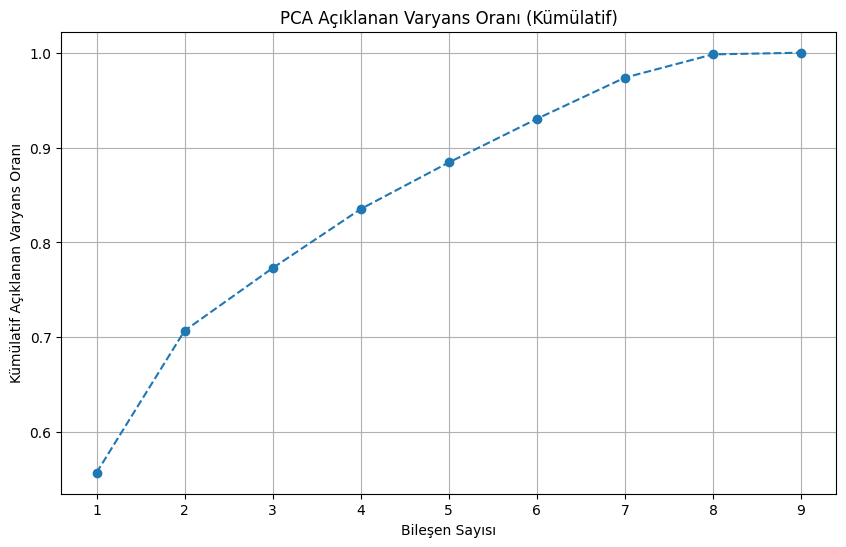

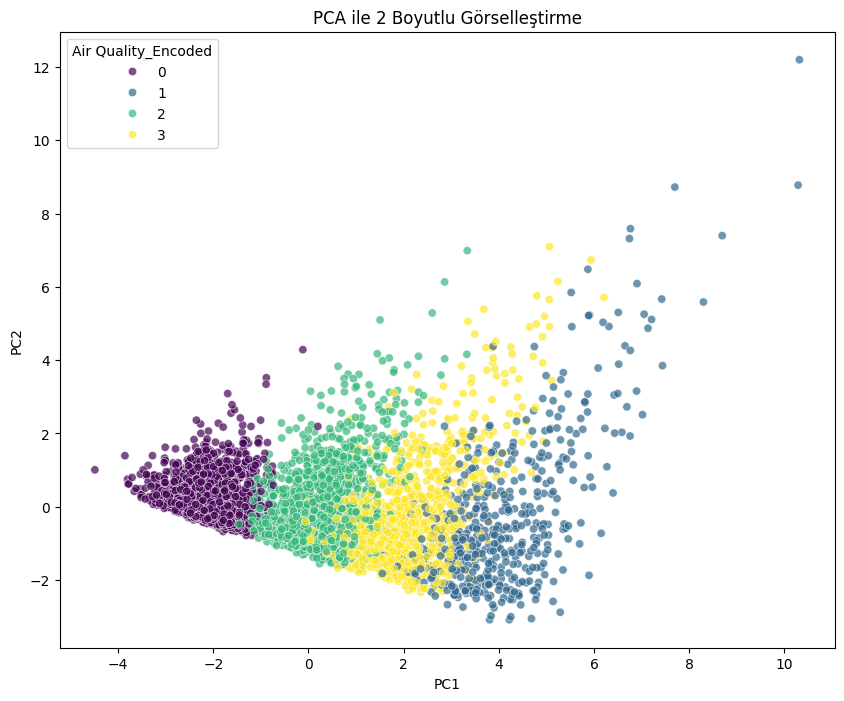


--- LDA ---


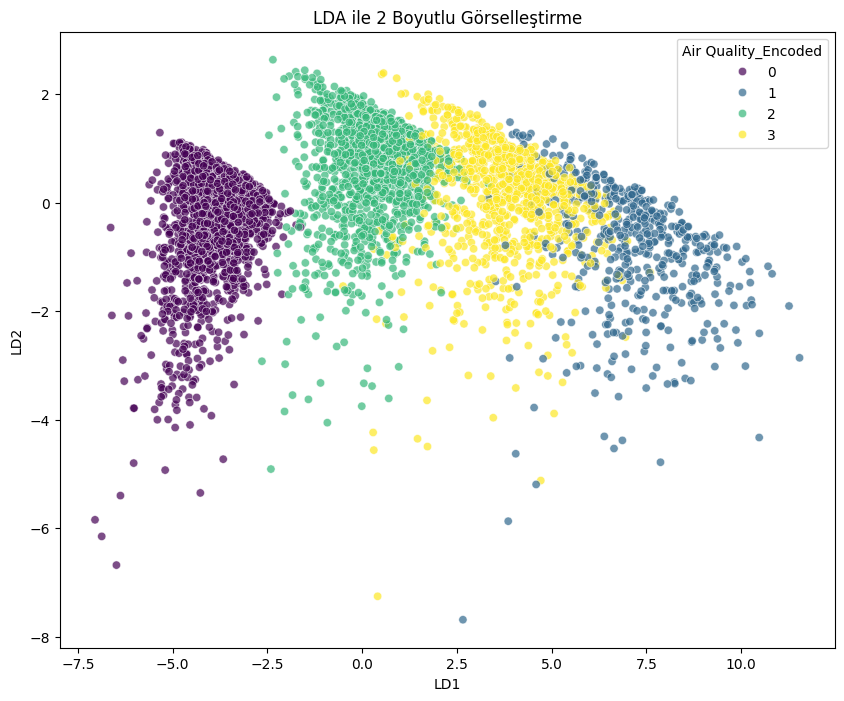


--- t-SNE ---


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


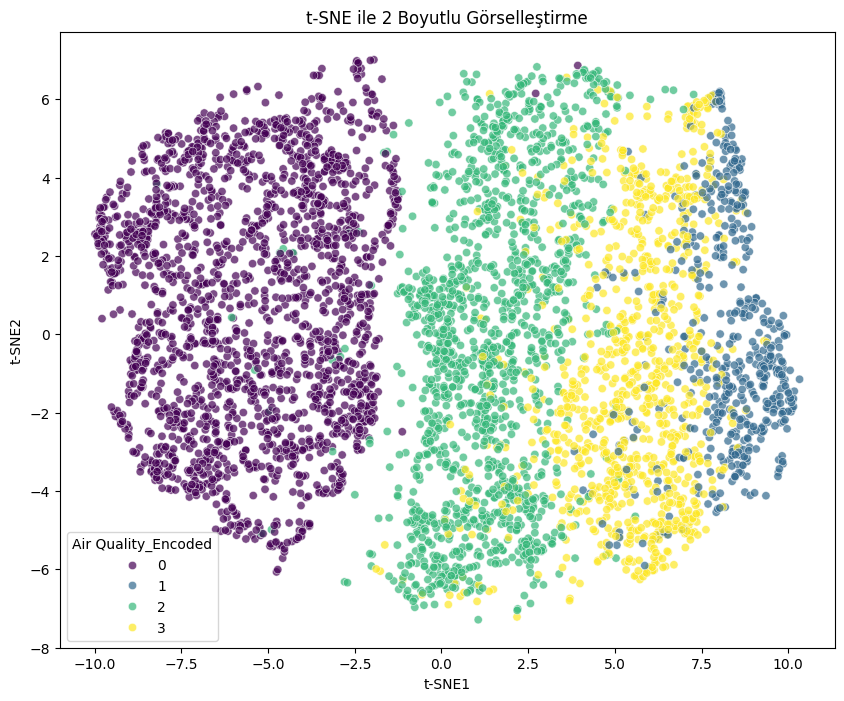

In [3]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Boyut ƒ∞ndirgeme ve G√∂rselle≈ütirme

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

# ==============================
# 1. Veri Y√ºkleme ve √ñn ƒ∞≈üleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!")

    # Kategorik s√ºtun kodlama
    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    # Sayƒ±sal s√ºtunlarƒ± √∂l√ßeklendirme
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("‚úÖ Veri √∂n i≈üleme tamamlandƒ±.")
except FileNotFoundError:
    print("‚ùå Hata: 'air_quality_data.csv' bulunamadƒ±.")
    exit()

# Baƒüƒ±msƒ±z deƒüi≈ükenler (X) ve hedef deƒüi≈üken (y)
X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])
y = df['Air Quality_Encoded']

# ==============================
# 2. PCA (Principal Component Analysis)
# ==============================
print("\n--- PCA ---")
pca = PCA()
pca.fit(X)

# K√ºm√ºlatif varyans grafiƒüi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('PCA A√ßƒ±klanan Varyans Oranƒ± (K√ºm√ºlatif)')
plt.xlabel('Bile≈üen Sayƒ±sƒ±')
plt.ylabel('K√ºm√ºlatif A√ßƒ±klanan Varyans Oranƒ±')
plt.grid(True)
plt.show()

# G√∂rselle≈ütirme i√ßin 2 bile≈üen
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y,
                palette='viridis', legend='full', alpha=0.7)
plt.title('PCA ile 2 Boyutlu G√∂rselle≈ütirme')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ==============================
# 3. LDA (Linear Discriminant Analysis)
# ==============================
print("\n--- LDA ---")
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y,
                palette='viridis', legend='full', alpha=0.7)
plt.title('LDA ile 2 Boyutlu G√∂rselle≈ütirme')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

# ==============================
# 4. t-SNE (t-Distributed Stochastic Neighbor Embedding)
# ==============================
print("\n--- t-SNE ---")
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y,
                palette='viridis', legend='full', alpha=0.7)
plt.title('t-SNE ile 2 Boyutlu G√∂rselle≈ütirme')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()


‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!
‚úÖ Veri √∂n i≈üleme tamamlandƒ±.
Eƒüitim seti: (3500, 9), Test seti: (1500, 9)

--- Lojistik Regresyon ---
En iyi parametreler: {'C': 10, 'penalty': 'l1'}

üîπ Lojistik Regresyon Test Accuracy: 0.8647
Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       600
   Hazardous       0.86      0.77      0.81       150
    Moderate       0.78      0.92      0.84       450
        Poor       0.73      0.57      0.64       300

    accuracy                           0.86      1500
   macro avg       0.84      0.81      0.82      1500
weighted avg       0.86      0.86      0.86      1500



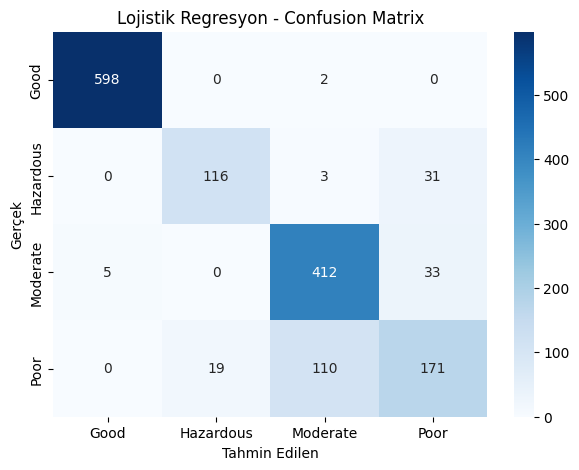


--- Karar Aƒüa√ßlarƒ± ---
En iyi parametreler: {'criterion': 'gini', 'max_depth': 10}

üîπ Karar Aƒüa√ßlarƒ± Test Accuracy: 0.9300
Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

        Good       0.99      0.99      0.99       600
   Hazardous       0.84      0.75      0.79       150
    Moderate       0.94      0.96      0.95       450
        Poor       0.83      0.86      0.84       300

    accuracy                           0.93      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.93      0.93      0.93      1500



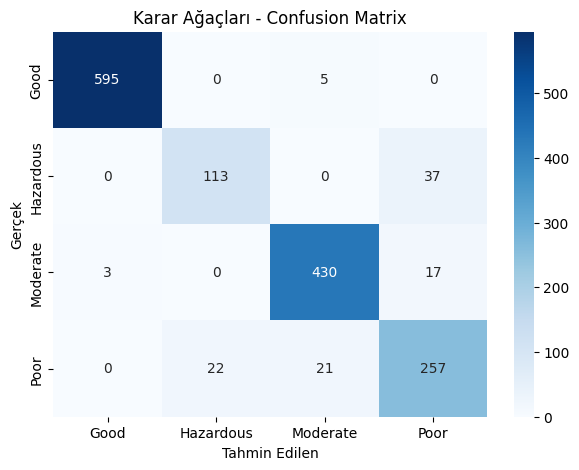


--- Rastgele Orman ---
En iyi parametreler: {'max_depth': None, 'n_estimators': 200}

üîπ Rastgele Orman Test Accuracy: 0.9480
Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       600
   Hazardous       0.88      0.79      0.83       150
    Moderate       0.96      0.97      0.97       450
        Poor       0.86      0.89      0.88       300

    accuracy                           0.95      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.95      0.95      0.95      1500



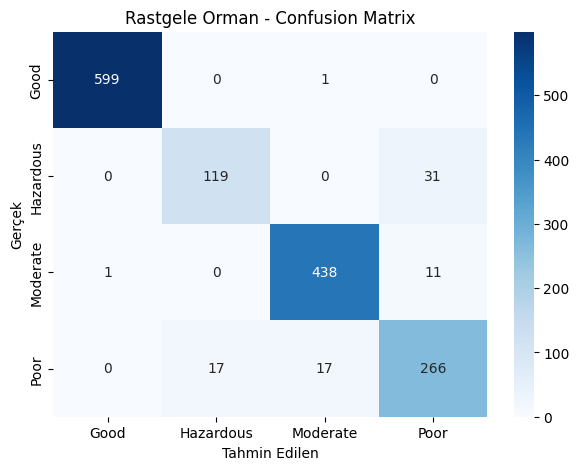


--- SVM ---
En iyi parametreler: {'C': 1, 'kernel': 'rbf'}

üîπ SVM Test Accuracy: 0.9393
Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       600
   Hazardous       0.87      0.81      0.84       150
    Moderate       0.94      0.96      0.95       450
        Poor       0.85      0.86      0.86       300

    accuracy                           0.94      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.94      0.94      0.94      1500



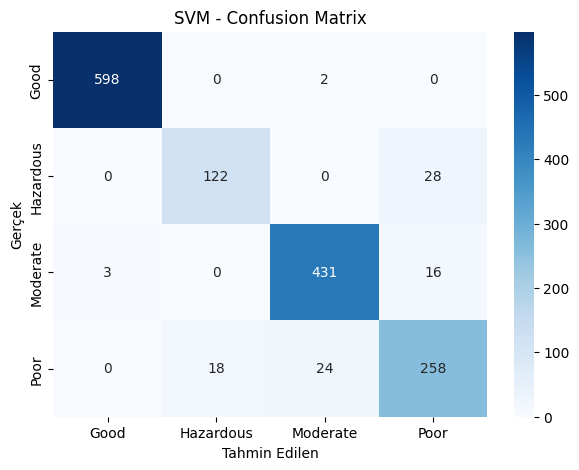


--- KNN ---
En iyi parametreler: {'n_neighbors': 7}

üîπ KNN Test Accuracy: 0.9287
Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       600
   Hazardous       0.90      0.71      0.80       150
    Moderate       0.92      0.96      0.94       450
        Poor       0.83      0.85      0.84       300

    accuracy                           0.93      1500
   macro avg       0.91      0.88      0.89      1500
weighted avg       0.93      0.93      0.93      1500



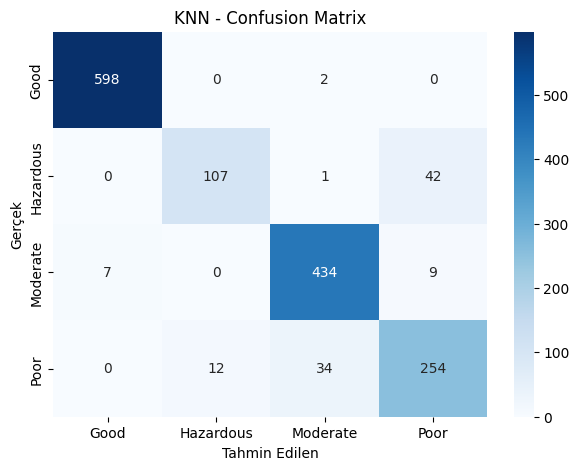

In [4]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Sƒ±nƒ±flandƒ±rma Modelleri Eƒüitimi ve Deƒüerlendirme

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 1. Veri Y√ºkleme ve √ñn ƒ∞≈üleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!")

    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print("‚úÖ Veri √∂n i≈üleme tamamlandƒ±.")
except FileNotFoundError:
    print("‚ùå Hata: 'air_quality_data.csv' bulunamadƒ±.")
    exit()

# Baƒüƒ±msƒ±z deƒüi≈ükenler ve hedef deƒüi≈üken
X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])
y = df['Air Quality_Encoded']

# Eƒüitim/Test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Eƒüitim seti: {X_train.shape}, Test seti: {X_test.shape}")

# ==============================
# 2. Yardƒ±mcƒ± Fonksiyon
# ==============================
def evaluate_model(model, X_test, y_test, model_name):
    """Model tahminlerini deƒüerlendir ve confusion matrix g√∂rselle≈ütir."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nüîπ {model_name} Test Accuracy: {acc:.4f}")
    print("Sƒ±nƒ±flandƒ±rma Raporu:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Ger√ßek')
    plt.show()

# ==============================
# 3. Lojistik Regresyon
# ==============================
print("\n--- Lojistik Regresyon ---")
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_log_reg, X_test, y_test, "Lojistik Regresyon")

# ==============================
# 4. Karar Aƒüa√ßlarƒ±
# ==============================
print("\n--- Karar Aƒüa√ßlarƒ± ---")
tree_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_tree, X_test, y_test, "Karar Aƒüa√ßlarƒ±")

# ==============================
# 5. Rastgele Orman
# ==============================
print("\n--- Rastgele Orman ---")
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_rf, X_test, y_test, "Rastgele Orman")

# ==============================
# 6. Destek Vekt√∂r Makineleri (SVM)
# ==============================
print("\n--- SVM ---")
svm_clf = SVC(random_state=42, probability=True)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_svm, X_test, y_test, "SVM")

# ==============================
# 7. K-En Yakƒ±n Kom≈üular (KNN)
# ==============================
print("\n--- KNN ---")
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_knn, X_test, y_test, "KNN")


‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!
‚úÖ Veri √∂n i≈üleme tamamlandƒ±.

--- K-Means Dirsek Y√∂ntemi ---


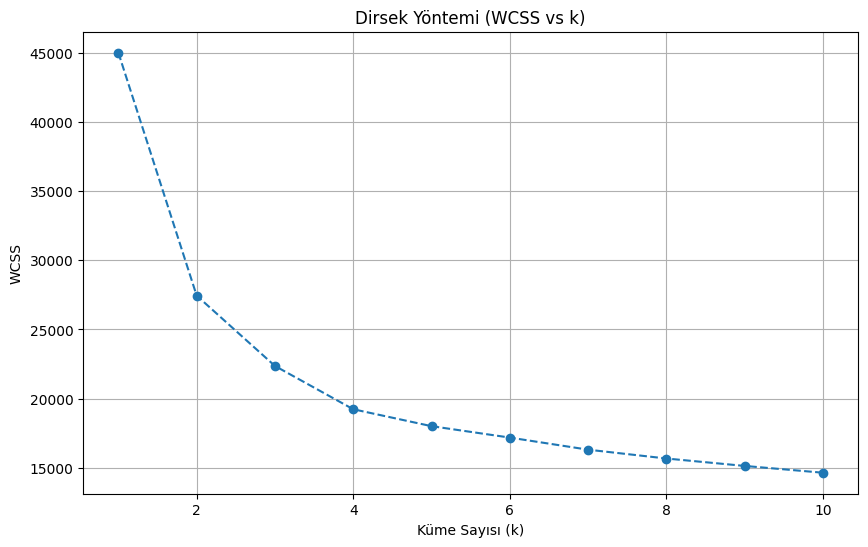


--- K-Means K√ºmeleme ---


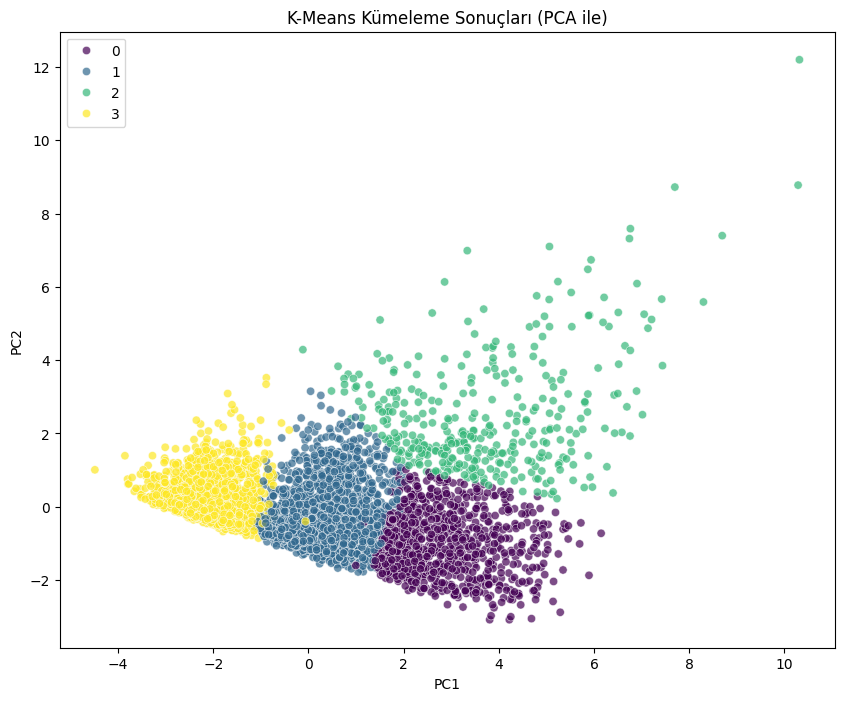


--- DBSCAN K√ºmeleme ---


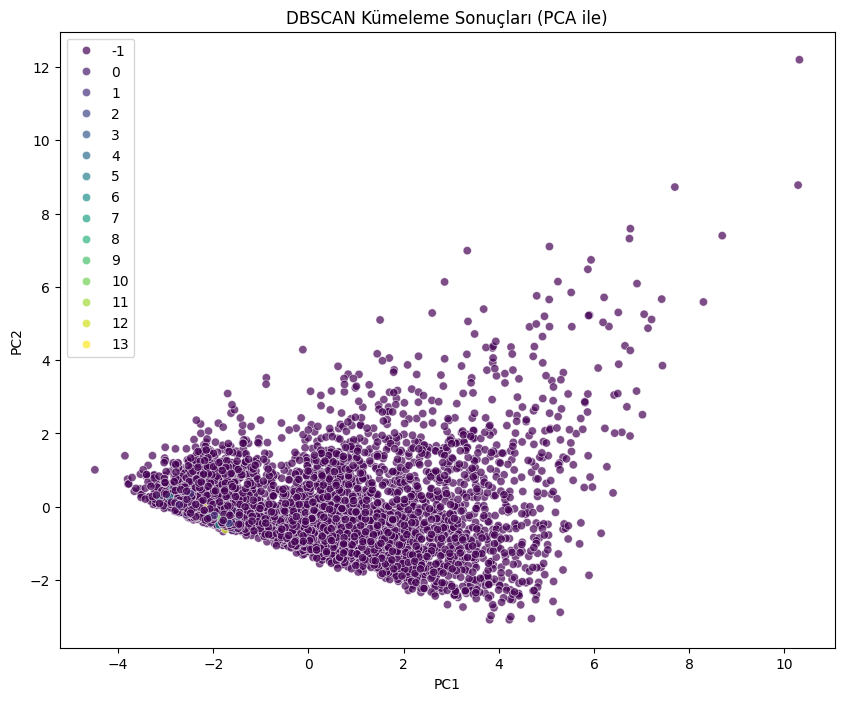


--- K√ºmeleme Sonu√ßlarƒ± Kar≈üƒ±la≈ütƒ±rma ---

K-Means √áapraz Tablo:
 K-Means K√ºmeleri    0     1    2     3
Ger√ßek Sƒ±nƒ±flar                       
0                   0     2    1  1997
1                 366     3  131     0
2                   5  1361   64    70
3                 539   290  170     1

DBSCAN √áapraz Tablo:
 DBSCAN K√ºmeleri   -1    0    1    2    3    4    5    6    7    8    9    10  \
Ger√ßek Sƒ±nƒ±flar                                                                
0                1871   17   12   29    9    5   12    7    6    6    5    5   
1                 500    0    0    0    0    0    0    0    0    0    0    0   
2                1500    0    0    0    0    0    0    0    0    0    0    0   
3                1000    0    0    0    0    0    0    0    0    0    0    0   

DBSCAN K√ºmeleri   11   12   13  
Ger√ßek Sƒ±nƒ±flar                 
0                  5    5    6  
1                  0    0    0  
2                  0    0    0  
3         

In [5]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - K√ºmeleme Analizi ve G√∂rselle≈ütirme

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# ==============================
# 1. Veri Y√ºkleme ve √ñn ƒ∞≈üleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!")

    # Etiket kodlama
    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    # √ñl√ßeklendirme
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print("‚úÖ Veri √∂n i≈üleme tamamlandƒ±.")
except FileNotFoundError:
    print("‚ùå Hata: 'air_quality_data.csv' bulunamadƒ±.")
    exit()

X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])

# ==============================
# 2. K-Means - Dirsek Y√∂ntemi
# ==============================
print("\n--- K-Means Dirsek Y√∂ntemi ---")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Dirsek Y√∂ntemi (WCSS vs k)')
plt.xlabel('K√ºme Sayƒ±sƒ± (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# ==============================
# 3. K-Means (k=4) ve G√∂rselle≈ütirme
# ==============================
print("\n--- K-Means K√ºmeleme ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++',
                max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels,
                palette='viridis', legend='full', alpha=0.7)
plt.title('K-Means K√ºmeleme Sonu√ßlarƒ± (PCA ile)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ==============================
# 4. DBSCAN K√ºmeleme
# ==============================
print("\n--- DBSCAN K√ºmeleme ---")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels,
                palette='viridis', legend='full', alpha=0.7)
plt.title('DBSCAN K√ºmeleme Sonu√ßlarƒ± (PCA ile)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ==============================
# 5. K√ºmeleme Sonu√ßlarƒ± ile Ger√ßek Sƒ±nƒ±flarƒ± Kar≈üƒ±la≈ütƒ±rma
# ==============================
print("\n--- K√ºmeleme Sonu√ßlarƒ± Kar≈üƒ±la≈ütƒ±rma ---")
kmeans_crosstab = pd.crosstab(df['Air Quality_Encoded'], kmeans_labels,
                              rownames=['Ger√ßek Sƒ±nƒ±flar'], colnames=['K-Means K√ºmeleri'])
print("\nK-Means √áapraz Tablo:\n", kmeans_crosstab)

dbscan_crosstab = pd.crosstab(df['Air Quality_Encoded'], dbscan_labels,
                              rownames=['Ger√ßek Sƒ±nƒ±flar'], colnames=['DBSCAN K√ºmeleri'])
print("\nDBSCAN √áapraz Tablo:\n", dbscan_crosstab)


‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!
‚úÖ Veri √∂n i≈üleme tamamlandƒ±.

--- Rastgele Orman ROC Eƒürisi ---


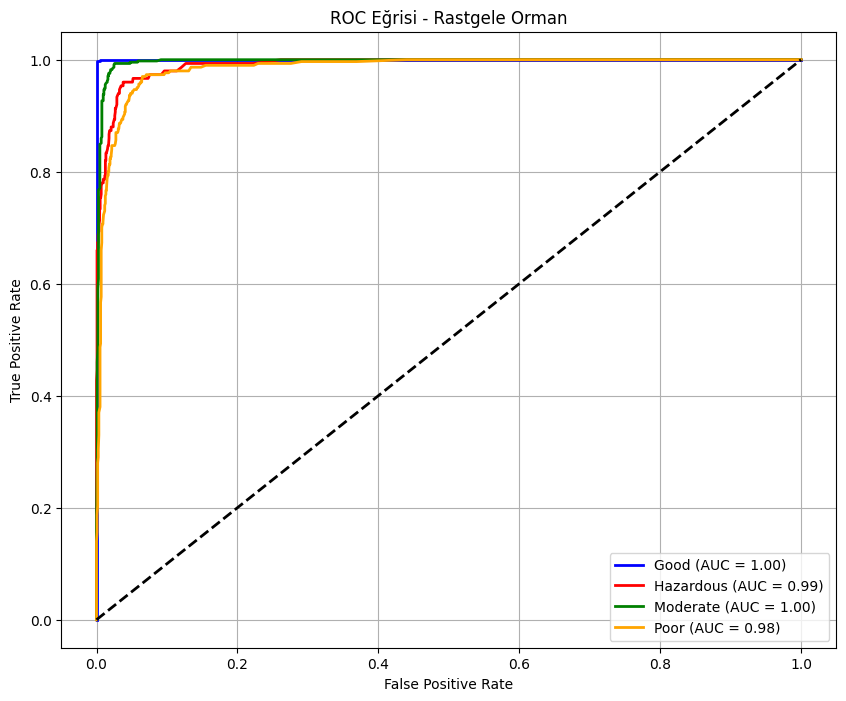


Rastgele Orman i√ßin sƒ±nƒ±f bazlƒ± AUC deƒüerleri:
  Good: 1.0000
  Hazardous: 0.9908
  Moderate: 0.9966
  Poor: 0.9849

--- SVM ROC Eƒürisi ---


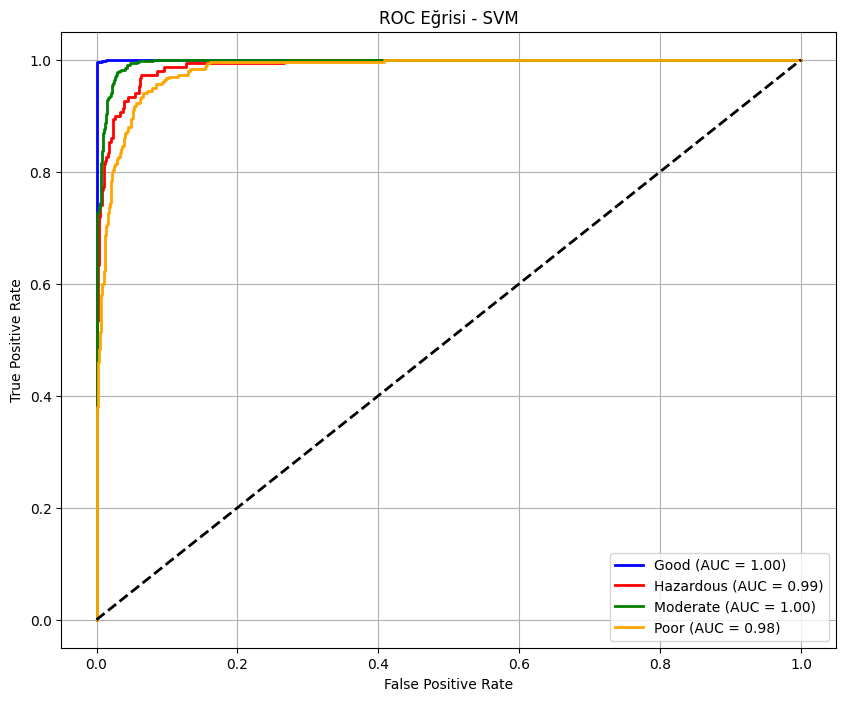


SVM i√ßin sƒ±nƒ±f bazlƒ± AUC deƒüerleri:
  Good: 1.0000
  Hazardous: 0.9895
  Moderate: 0.9956
  Poor: 0.9819


In [6]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Sonu√ßlarƒ±n Grafiklerle Sunumu

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# ==============================
# 1. Veri Y√ºkleme ve √ñn ƒ∞≈üleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("‚úÖ Veri seti ba≈üarƒ±yla y√ºklendi!")

    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print("‚úÖ Veri √∂n i≈üleme tamamlandƒ±.")
except FileNotFoundError:
    print("‚ùå Hata: 'air_quality_data.csv' bulunamadƒ±.")
    exit()

X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])
y = df['Air Quality_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==============================
# 2. ROC Eƒürisi √áizim Fonksiyonu
# ==============================
def plot_multiclass_roc(clf, X_test, y_test, n_classes, model_name, label_encoder):
    y_score = clf.predict_proba(X_test)

    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'orange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f"{label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Eƒürisi - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"\n{model_name} i√ßin sƒ±nƒ±f bazlƒ± AUC deƒüerleri:")
    for i in range(n_classes):
        print(f"  {label_encoder.inverse_transform([i])[0]}: {roc_auc[i]:.4f}")

# ==============================
# 3. Rastgele Orman ROC Eƒürisi
# ==============================
print("\n--- Rastgele Orman ROC Eƒürisi ---")
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
plot_multiclass_roc(rf_clf, X_test, y_test, n_classes=4,
                    model_name='Rastgele Orman', label_encoder=label_encoder)

# ==============================
# 4. SVM ROC Eƒürisi (CalibratedClassifierCV ile)
# ==============================
print("\n--- SVM ROC Eƒürisi ---")
svm_clf = SVC(C=1, kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
plot_multiclass_roc(svm_clf, X_test, y_test, n_classes=4,
                    model_name='SVM', label_encoder=label_encoder)


/tmp/ipython-input-163307974.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='F1-Skoru', data=df_skorlar, palette='viridis')


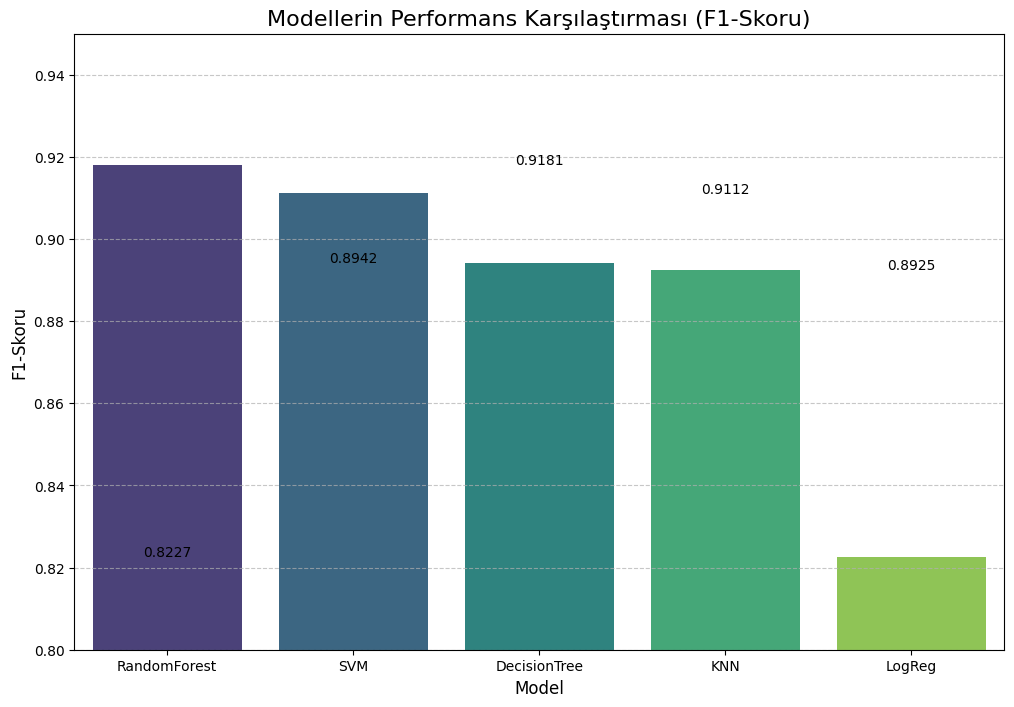


Grafik ba≈üarƒ±yla olu≈üturuldu. Bu g√∂rseli sunumunuzda kullanabilirsiniz.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daha √∂nce bulduƒüumuz model F1-skorlarƒ±
# Bu deƒüerler, projede yapƒ±lan model deƒüerlendirme ve hiperparametre optimizasyonu sonucunda elde edilmi≈ütir.
model_skorlari = {
    'Model': ['LogReg', 'DecisionTree', 'RandomForest', 'SVM', 'KNN'],
    'F1-Skoru': [0.8227, 0.8942, 0.9181, 0.9112, 0.8925]
}
df_skorlar = pd.DataFrame(model_skorlari)

# F1-skorlarƒ±na g√∂re modelleri sƒ±rala
df_skorlar = df_skorlar.sort_values(by='F1-Skoru', ascending=False)

# Bar grafiƒüini olu≈ütur
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='F1-Skoru', data=df_skorlar, palette='viridis')

# Ba≈ülƒ±klar ve etiketler
plt.title('Modellerin Performans Kar≈üƒ±la≈ütƒ±rmasƒ± (F1-Skoru)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1-Skoru', fontsize=12)

# Her √ßubuƒüun √ºzerine F1-skor deƒüerini yazdƒ±r
for index, row in df_skorlar.iterrows():
    ax.text(row.name, row['F1-Skoru'], round(row['F1-Skoru'], 4), color='black', ha="center", fontsize=10)

# Y ekseninin g√∂r√ºn√ºm√ºn√º iyile≈ütir
plt.ylim(0.80, 0.95)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiƒüi g√∂ster
plt.show()

print("\nGrafik ba≈üarƒ±yla olu≈üturuldu. Bu g√∂rseli sunumunuzda kullanabilirsiniz.")